In [2]:
import os
import av
import pathlib
import numpy as np
import torch
import argparse
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from datasets import load_dataset
from datasets import Dataset
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")

/home/907308160/code/nairr/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NPZ Files

In [4]:

npz_file = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train/FldgzyEOSH8_373115_380731.npz'
npz_file = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/G_QWtUFFAFQ_100000_110000_58e7cf3e46e13dfd851a2932.npz"
npz_file = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/G_QWtUFFAFQ_119000_129000_58e7cf3e46e13dfd851a290c.npz"
npz_file = "/data2/juve/dataset/vatex/npz_datasets/VATEX_8_frames/test/Z_xtupU1Orw_000000_000010.npz"
npz_data = np.load(npz_file)
npz_data.files

['arr_0', 'arr_1']

In [5]:
processed_images = torch.from_numpy(npz_data['arr_0']) 
print(type(processed_images), processed_images.shape)

<class 'torch.Tensor'> torch.Size([8, 3, 224, 224])


In [6]:
processed_captions = torch.from_numpy(npz_data['arr_1'])
print(type(processed_captions), processed_captions.shape)

<class 'torch.Tensor'> torch.Size([10, 1024])


In [7]:
print(processed_captions.shape)

torch.Size([10, 1024])


In [8]:
print(tokenizer.batch_decode(processed_captions, skip_special_tokens=True))

['A group of young boys play and throw snow balls outside in the snow.', 'A young man get hit on the back with a snowball then comes back later to hesitantly throw one.', 'A group of few persons arecplaying with snow ball in the snow surface', 'People are playing outside int he snow, laughing, and shouting.', 'It looks like three boys having a snow ball fight and having a good time.', 'a group of kids are running outside in the snow while another kid is laughing.', 'Several young adults are outside having a snowball fight in deep snow drifts.', 'Kids are running around in the snow in their yards and throwing snow.', 'A man runs down a snowy Street while other people laugh and someone yells no before he walks back and the camera shakes wildly.', 'A group of teens throw snow balls at each other in front of a snow bank.']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8606442213058472..2.640000104904175].


(8, 3, 224, 224)
(3, 224, 224)
(224, 224, 3)


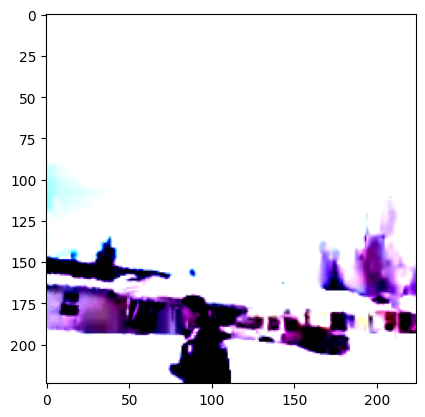

In [9]:
import matplotlib.pyplot as plt

np_images = processed_images.detach().numpy()
an_image = np_images[6]
print(np_images.shape)
print(an_image.shape)

# Transpose channels last to give to imshow
first_image_channel_last = np.transpose(an_image, (1, 2, 0))
print(first_image_channel_last.shape)
plt.imshow(first_image_channel_last)
plt.show()

# NPZ Dataloader with batching

In [10]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class NPZDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_names = os.listdir(data_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_names[idx])
        data = np.load(file_path)
        # Assuming each .npz file contains 'data' and 'label'
        sample = {'filenames': self.file_names[idx], 'pixel_values': torch.from_numpy(data['arr_0']), 'labels': torch.from_numpy(data['arr_1'])}
        return sample

In [13]:

# data_dir = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/train'
data_dir = "/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames"
data_dir = "/data2/juve/dataset/vatex/npz_datasets/VATEX_8_frames/test"
dataset = NPZDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [14]:
len(dataloader)

166

In [15]:
for batch in dataloader:
    filenames, images, captions = batch['filenames'], batch['pixel_values'], batch['labels']
    # Train your model here
    print(filenames, images.shape, captions.shape)

    import sys
    sys.exit

['uLdte1tRPMs_000002_000012.npz', 'XQIkD8YdUFY_000093_000103.npz', 'V0FvmFkqQKM_000030_000040.npz', '5JrtNrENUyk_000003_000013.npz', '6LRgQW0n2LA_000065_000075.npz', 'tk6XdoUmoW0_000060_000070.npz', '2HiDlFDURVs_000019_000029.npz', 'X0tG5hbo9AI_000034_000044.npz', 'o-ctR6-CsCI_000078_000088.npz', '2Y7Z2Eb7B-g_000000_000010.npz', 'dMNdssqAA08_000056_000066.npz', '1eb7-V13Tms_000000_000010.npz', '9qx4OljmURU_000113_000123.npz', 'FYDigD-c6jY_000015_000025.npz', '3OJasCVIqrM_000016_000026.npz', 'Zr7VBWsIaA0_000025_000035.npz', 'kS4WteNhMMI_000017_000027.npz', 'jAcg06oM8-k_000028_000038.npz', 'AZEiLkvPm8A_000110_000120.npz', 'D9a0pk3MTOw_000002_000012.npz', 'eazRPFhEkuM_000000_000010.npz', '9-eiUz08Y0E_000005_000015.npz', 'e3uc4YfI9jA_000000_000010.npz', 'v-gBCLJepGg_000049_000059.npz', 'n4Af1LYYBfE_000079_000089.npz', 'Y2Y8uhqwBUs_000015_000025.npz', '5vPjOZKqo6M_000047_000057.npz', 'M1WsNJtWsFk_000084_000094.npz', '3ZIqU8dm-G0_000046_000056.npz', 'SGRw3Ux1phI_000009_000019.npz', 'e3Flepfb

KeyboardInterrupt: 